**Problem Statement!**

As someone who has stopped gymming for awhile and trying to get back into a gym routine/habit, I think it would be fun to work with a dataset pertinent to fitness routine; which I chanced upon while sifting through kaggle. This project is an opportunity to explore how body habitus (e.g. weight, BMI etc.) and exercise routines can help to impact calorie expenditure. Understanding these patterns may help to optimize workouts!

In [45]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv('/content/drive/MyDrive/5510 ML course/Final Assessment/gym_members_exercise_tracking.csv')

In [21]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


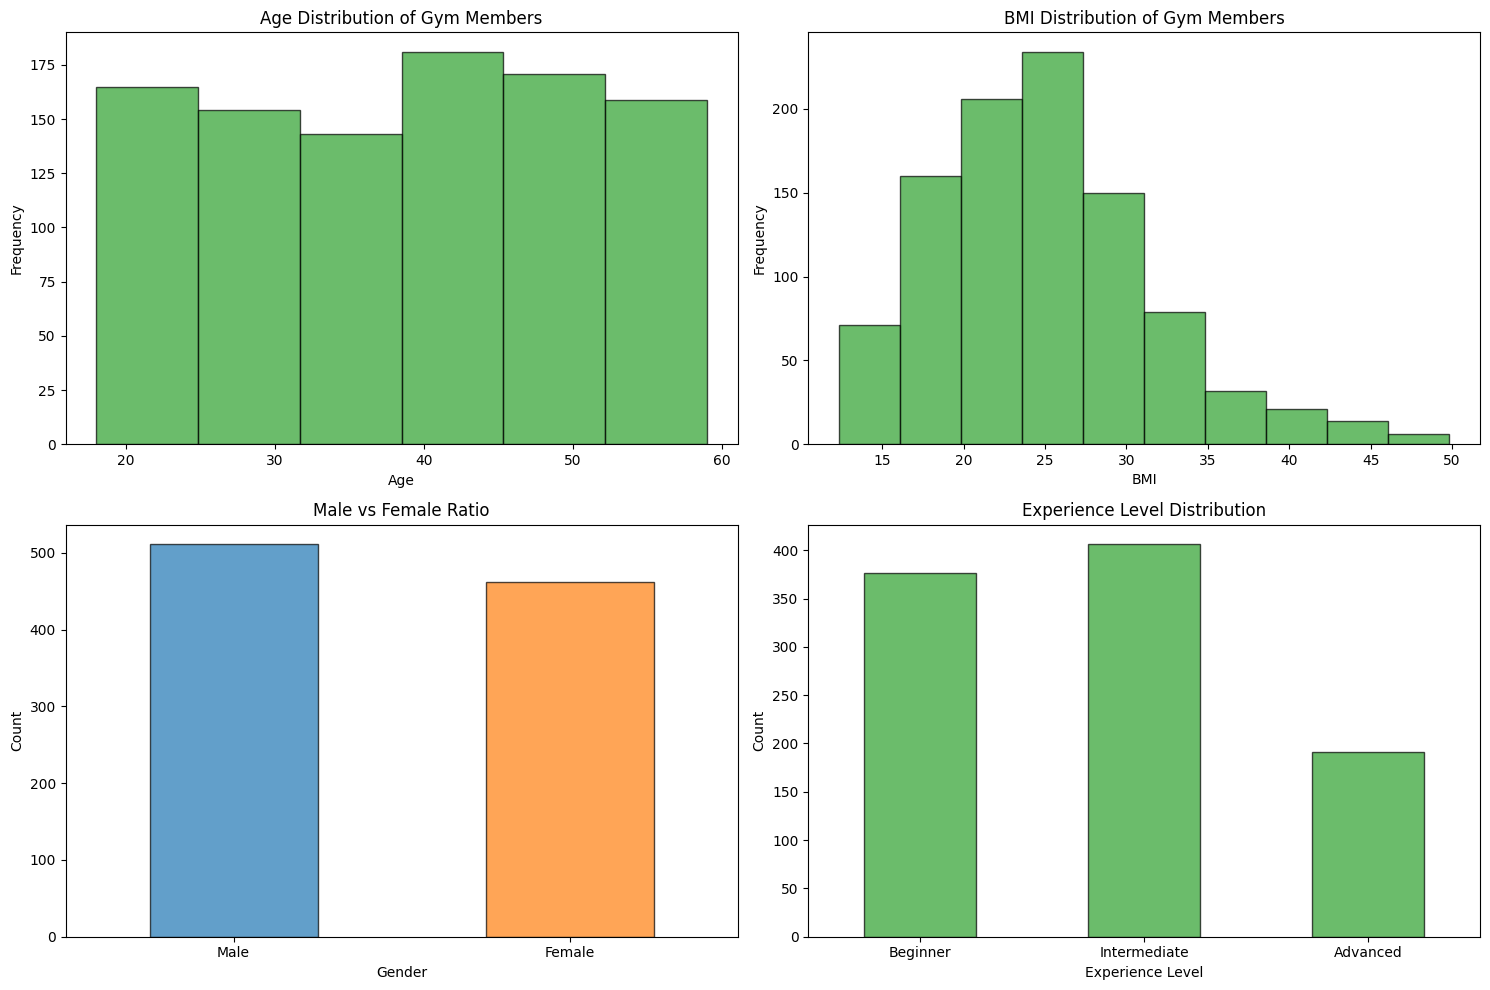

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age Distribution
axes[0, 0].hist(df["Age"], bins=6, edgecolor='black',  color="#2ca02c", alpha=0.7)
axes[0, 0].set_title("Age Distribution of Gym Members")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Frequency")

# BMI Distribution
axes[0, 1].hist(df["BMI"], bins=10, edgecolor='black', color="#2ca02c", alpha=0.7)
axes[0, 1].set_title("BMI Distribution of Gym Members")
axes[0, 1].set_xlabel("BMI")
axes[0, 1].set_ylabel("Frequency")

# Male vs Female Ratio
gender_counts = df["Gender"].value_counts()
gender_counts.plot(kind="bar", ax=axes[1, 0], color=["#1f77b4", "#ff7f0e"], edgecolor='black', alpha=0.7)
axes[1, 0].set_title("Male vs Female Ratio")
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_xticklabels(gender_counts.index, rotation=0)

# Experience Level
experience_counts = df["Experience_Level"].value_counts().sort_index()
experience_counts.plot(kind="bar", ax=axes[1, 1], color="#2ca02c", edgecolor='black', alpha=0.7)
axes[1, 1].set_title("Experience Level Distribution")
axes[1, 1].set_xlabel("Experience Level")
axes[1, 1].set_ylabel("Count")
axes[1, 1].set_xticklabels(["Beginner", "Intermediate", "Advanced"], rotation=0)

plt.tight_layout()
plt.show()


In [23]:
df.head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [24]:
df['Workout_Type'].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

At this point, I will drop height and weight because these parameters are already encapsulated in the BMI parameter.

In [25]:
df = df.drop(['Height (m)', 'Weight (kg)'], axis=1)
df.head(5)

,Age,Gender,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


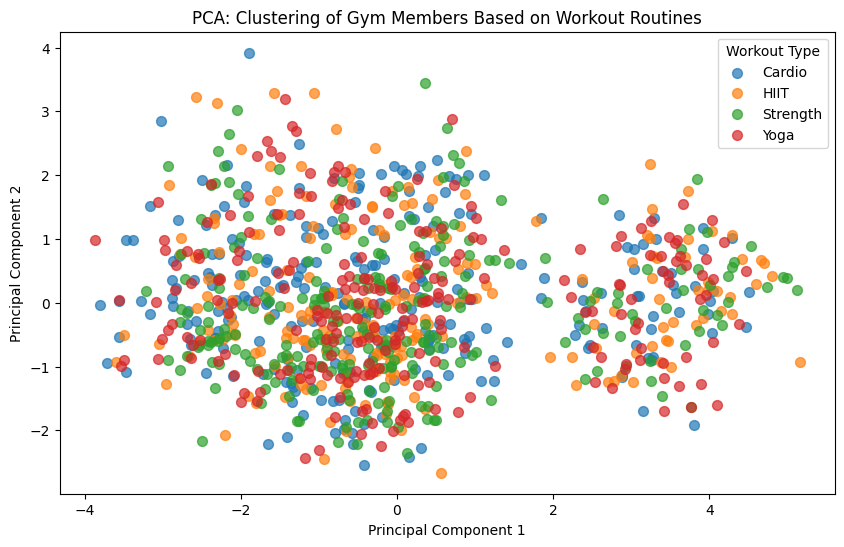

In [31]:
cmap = plt.get_cmap('viridis')

workout_types = df["Workout_Type"].astype("category")
codes = workout_types.cat.codes
labels = workout_types.cat.categories

plt.figure(figsize=(10, 6))
for code, label in enumerate(labels):
    plt.scatter(
        pca_result[codes == code, 0],
        pca_result[codes == code, 1],
        label=label,
        alpha=0.7,
        s=50
    )

plt.title("PCA: Clustering of Gym Members Based on Workout Routines")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.legend(title="Workout Type", loc="best")
plt.show()

From the above PCA analysis, there is significant overlap between points of different colors, meaning that members with different workout types share similar characteristics. If the workout types were strongly correlated with certain characteristics, we should see clusters forming instead of this overlap.


There is a few more things that we need to clear up before we start on the unsupervised (feature extraction) followed by supervised (prediction).

1.   Firstly, we should do calories/hr by making the division and dropping the session_duration column.
2.   Encode gender and workout type

We will leave experience level as it is because there is possibly some basis as to level 1 (beginner) having a lower caloric burn than intermediate or advanced.




In [37]:
df['Calories_per_Hour'] = df['Calories_Burned'] / df['Session_Duration (hours)']
df = df.drop(['Calories_Burned', 'Session_Duration (hours)'], axis=1)

df.head(5)

,Age,Gender,Max_BPM,Avg_BPM,Resting_BPM,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Calories_per_Hour
0,56,Male,180,157,60,Yoga,12.6,3.5,4,3,30.20,776.923077
1,46,Female,179,151,66,HIIT,33.9,2.1,4,2,32.00,679.230769
2,32,Female,167,122,54,Cardio,33.4,2.3,4,2,24.71,609.909910
3,25,Male,190,164,56,Strength,28.8,2.1,3,1,18.41,901.694915
4,38,Male,188,158,68,Strength,29.2,2.8,3,1,14.39,868.750000


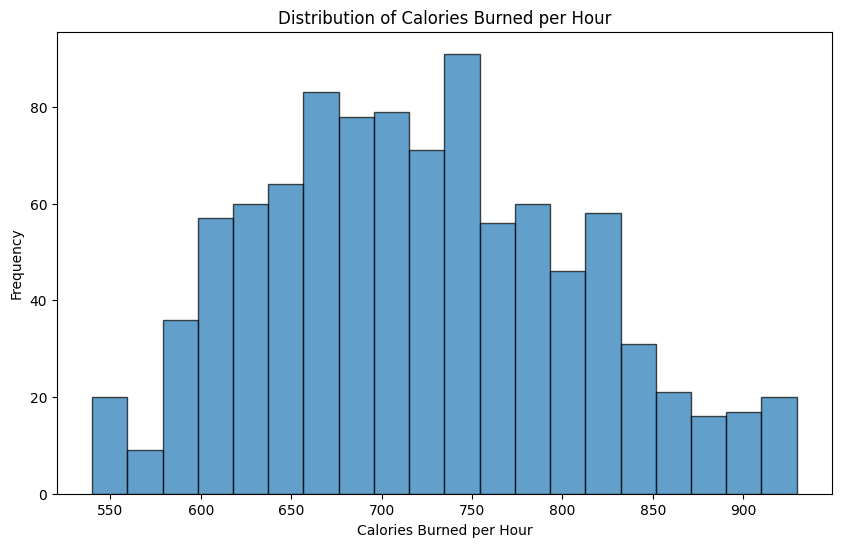

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(df['Calories_per_Hour'], bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribution of Calories Burned per Hour")
plt.xlabel("Calories Burned per Hour")
plt.ylabel("Frequency")
plt.show()


In [43]:
gender_mapping = {"Male": 0, "Female": 1}
df['Gender_Encoded'] = df['Gender'].map(gender_mapping)


encoder = OneHotEncoder(sparse_output=False, drop='first')
workoutEncoded = encoder.fit_transform(df[['Workout_Type']])

encodedDf = pd.DataFrame(
    workoutEncoded,
    columns=[f"Workout_{category}" for category in encoder.categories_[0][1:]]
)

df_encoded = pd.concat([df, encodedDf], axis=1)
df_encoded = df_encoded.drop(['Gender', 'Workout_Type'], axis=1)

print(df_encoded.head(5))

   Age  Max_BPM  Avg_BPM  Resting_BPM  Fat_Percentage  Water_Intake (liters)  \
0   56      180      157           60            12.6                    3.5   
1   46      179      151           66            33.9                    2.1   
2   32      167      122           54            33.4                    2.3   
3   25      190      164           56            28.8                    2.1   
4   38      188      158           68            29.2                    2.8   

   Workout_Frequency (days/week)  Experience_Level    BMI  Calories_per_Hour  \
0                              4                 3  30.20         776.923077   
1                              4                 2  32.00         679.230769   
2                              4                 2  24.71         609.909910   
3                              3                 1  18.41         901.694915   
4                              3                 1  14.39         868.750000   

   Gender_Encoded  Workout_HIIT  Worko

Here we will split the data into train and test! 0.2

In [44]:
train_data, test_data = train_test_split(df_encoded, test_size=0.2, random_state=1108)
print(f'traindata {train_data.shape}')
print(f'testdata {test_data.shape}')

traindata (778, 14)
testdata (195, 14)


In [47]:
X_train = train_data.drop('Calories_per_Hour', axis=1)
y_train = train_data['Calories_per_Hour']

X_test = test_data.drop('Calories_per_Hour', axis=1)
y_test = test_data['Calories_per_Hour']

In [56]:
nmf = NMF(n_components=10, init='random', random_state=1108, max_iter= 2000)
X_train_nmf = nmf.fit_transform(X_train)
X_test_nmf = nmf.transform(X_test)

In [57]:
svr = SVR(kernel='linear')
svr.fit(X_train_nmf, y_train)

y_pred = svr.predict(X_test_nmf)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1112.1792486253305
RMSE: 33.349351547298944
R² Score: 0.8336421642742788


We will now look at how changing our unsupervised learning (extraction) components can help to improve our RMSE!

In [63]:
RMSE_values = []
R2_values = []

for i in range(1, 16):
    nmf = NMF(n_components=i, init='random', random_state=1108, max_iter=5000)
    X_train_nmf = nmf.fit_transform(X_train)
    X_test_nmf = nmf.transform(X_test)

    svr = SVR(kernel='linear')
    svr.fit(X_train_nmf, y_train)

    y_pred = svr.predict(X_test_nmf)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    RMSE_values.append(rmse)
    R2_values.append(r2)

print("RMSE Values:", RMSE_values)
print("R² Values:", R2_values)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 5000 reached. Increase it to improve convergence.
  warnings.warn(


RMSE Values: [74.96438227105133, 53.580156781709626, 46.887797808347386, 49.45560882558968, 60.261567649534484, 72.25887396566496, 68.91057135580685, 55.968297056566136, 50.199003587620574, 33.349351547298944, 47.18526699500814, 44.099542157692206, 43.031101687270585, 31.432645321706996, 40.36312115327212]
R² Values: [0.15942124894633014, 0.5705857678993318, 0.6711573455357467, 0.6341529315887128, 0.4568130537071967, 0.21900032509173784, 0.289702680728969, 0.5314535413422963, 0.6230717677744226, 0.8336421642742788, 0.6669715717560254, 0.7091047462702729, 0.7230295706696077, 0.8522150060219206, 0.7563098602407903]


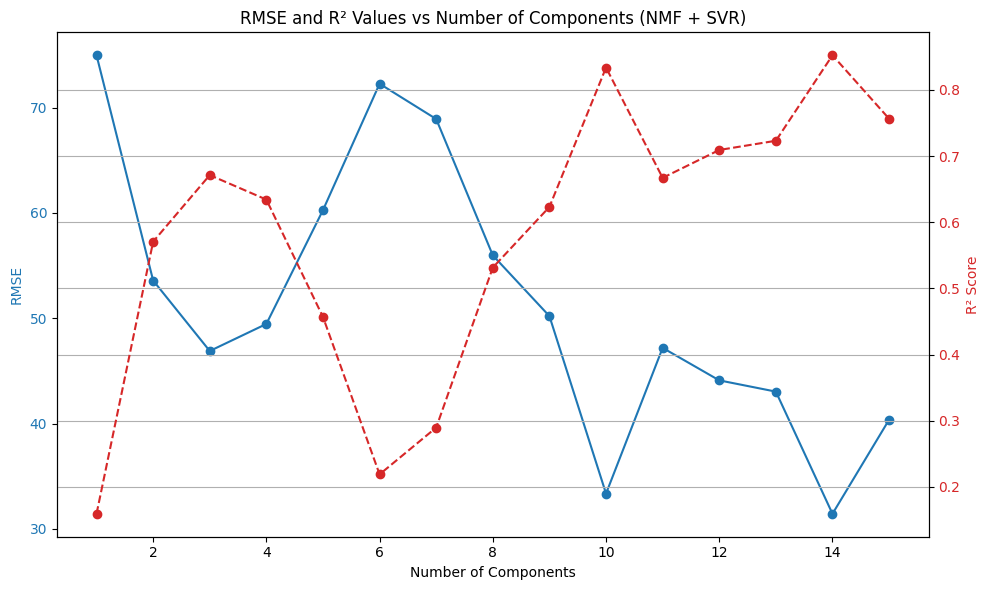

In [76]:
components = list(range(1, 16))

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('RMSE', color=color)
ax1.plot(components, RMSE_values, marker='o', linestyle='-', color=color, label='RMSE')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('R² Score', color=color)
ax2.plot(components, R2_values, marker='o', linestyle='--', color=color, label='R² Score')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('RMSE and R² Values vs Number of Components (NMF + SVR)')
fig.tight_layout()
plt.grid(True)

plt.show()

Let's look at how our model will do without using unsupervised learning to extract the features! As we can see below; it is quite disappointing that our NMF feature extraction + SVR model did not do as well as just simply training the SVR model.

This could possibly be attributed towards information loss because NMF itself is a dimension reduction approach! If we were to look back at the data itself, parameters such as age, BMI etc; the intuition is that they already hold quite a fair bit of predictive power.



In [58]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Mean Squared Error: 515.9456033626874
RMSE: 22.71443601242803
R² Score: 0.9228257549008335


Another attempt at NMF + SVR but this time, we stack the NMF instead of just replacing the original training data. We observe a small marginal improvement in the RMSE and R^2 suggesting that our previous assumption that our initial parameters already holding predictive power is correct!

In [74]:
nmf = NMF(n_components=10, init='random', random_state=1108, max_iter=5000)
X_train_nmf = nmf.fit_transform(X_train)
X_test_nmf = nmf.transform(X_test)

X_train_augmented = np.hstack([X_train, X_train_nmf])
X_test_augmented = np.hstack([X_test, X_test_nmf])

svr = SVR(kernel='linear')
svr.fit(X_train_augmented, y_train)

y_pred = svr.predict(X_test_augmented)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Augmented RMSE: {rmse}")
print(f"Augmented R² Score: {r2}")

Augmented RMSE: 22.65576744284285
Augmented R² Score: 0.9232239030493823


Just for fun, but now I can calculate how much calories I can burn so that I can enjoy my next snack!

**Resources:**

Datasource: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset/data

Tools: Googlecolab AI assistive coding features